In [1]:
from netCDF4 import Dataset
import numpy as np
#from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xarray as xr
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

In [2]:
#%%
ds_oro = xr.open_dataset("/home/caroline/chaldene/cds_data_ERA5/single_level/Era5_orography_singleLevel.nc")
lons = ds_oro.variables['longitude'][:]
lats = ds_oro.variables['latitude'][:]
height = ds_oro.variables['z_0001'][:]

#ds_RH = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/Era5_2009to2018_RH_600hPa.nc')
#RH = ds_RH['r']


In [3]:
#load surface pressure and surface temperature data in
ds_surface_P_T = xr.open_dataset("/home/caroline/chaldene/cds_data_ERA5/single_level/Era5_singleLevel_test_T_SurfacePressure.nc")
#ds_MaunaKea = ds_surface_P_T.sel(longitude=204.53,latitude= 19.83,method='nearest')
Temperature = ds_surface_P_T.t2m
Surf_Pr = ds_surface_P_T.sp

In [5]:
ds_orography = xr.open_dataset('/home/caroline/chaldene/cds_data_ERA5/single_level/Era5_orography_singleLevel.nc')
ds_MaunaKea = ds_orography.sel(longitude=204.53,latitude= 19.83,method='nearest')
MK = ds_MaunaKea['z_0001']
#grid location (lon/lat) of MaunaKea
ds_MaunaKea = ds_orography.sel(longitude=(360-155.46806),latitude= 19.82083,method='nearest')
ds_Paranal = ds_orography.sel(longitude = (360-70.4), latitude = -24.63, method = 'nearest')
ds_Tololo = ds_orography.sel(longitude = (360-70.81), latitude = -30.17, method = 'nearest')
ds_Pachon = ds_orography.sel(longitude = (360-70.73), latitude = -30.23, method = 'nearest')
ds_laSilla = ds_orography.sel(longitude = (360-70.74), latitude = -29.26, method = 'nearest')

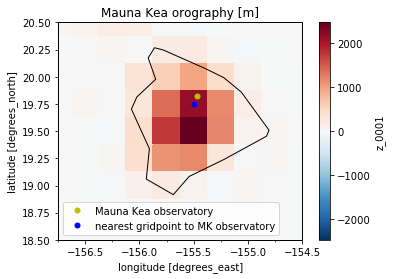

In [5]:
######### orography of Mauna Kea ###################

#%% elevation
g= 9.81
ele = ds_orography.z_0001
#ele[0, 279:283, 817:821]
MK = ele[0, 275:287, 813:825]/g
# MK.plot()
#air2d = ele.isel(time = 0)

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)

MK.plot(ax=ax, transform=ccrs.PlateCarree());

ax.coastlines();
ax.set_extent([203.25, 205.5, 18.5, 20.5]) #, ccrs.Geodetic()

#ax.set_xticks([(360-203.25), (360-203.5), (360-203.75), (360-204.0), (360-204.25), (360-204.5), (360-204.75)
#              , (360-205), (360-205.25), (360-205.5)], crs=ccrs.PlateCarree())
MK_x_ticks = np.arange(-156.75, -154.25, 0.25)
ax.set_xticks(MK_x_ticks, crs=ccrs.PlateCarree(), minor = True)
MK_y_ticks = np.arange(18.5, 20.75, 0.25)
ax.set_yticks(MK_y_ticks,crs=ccrs.PlateCarree())
#ax.xticks(rotation=90)
#ax.gridlines(draw_labels=True)
#observatory (google maps) Mauna Kea
lon = -155.46806
lat = 19.82083
#x,y = m2(lon, lat)
plt.plot(lon, lat, 'yo', markersize=5, label = 'Mauna Kea observatory', transform=ccrs.PlateCarree())

#nearest
lon = -155.5
lat = 19.75
#x,y = m2(lon, lat)
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint to MK observatory', transform=ccrs.PlateCarree())

plt.title("Mauna Kea orography [m]")
plt.legend(loc = 'lower left')
fig1 = plt.gcf()
fig1.savefig('MaunaKea_cartopy_2.pdf')
plt.show()


In [48]:
Surf_Pr[0,281,818]/100 # Mauna Kea

<xarray.DataArray 'sp' ()>
array(783.61625)
Coordinates:
    longitude  float32 204.5
    latitude   float32 19.75
    time       datetime64[ns] 2017-01-01

In [49]:
ds_orography.z_0001[0,281,818]/g

<xarray.DataArray 'z_0001' ()>
array(2184.42915392)
Coordinates:
    longitude  float32 204.5
    latitude   float32 19.75
    time       datetime64[ns] 2019-03-01

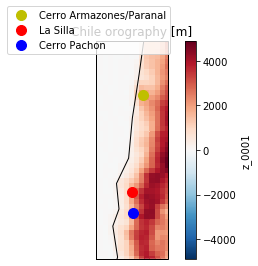

In [51]:
# orography of Chile ###################

#%% elevation
g= 9.81
ele = ds_orography.z_0001
#ele[0, 279:283, 817:821]
Chile = ele[0, 448:491, 1150:1165]/g
# MK.plot()
#air2d = ele.isel(time = 0)

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)

Chile.plot(ax=ax, transform=ccrs.PlateCarree());

ax.coastlines();
ax.set_extent([-72.5, -69, -32.5, -22])
#ax.set_extent([268.5, 273.25, -22.0, -32.5]) #, ccrs.Geodetic()

#ax.set_xticks([(360-203.25), (360-203.5), (360-203.75), (360-204.0), (360-204.25), (360-204.5), (360-204.75)
#              , (360-205), (360-205.25), (360-205.5)], crs=ccrs.PlateCarree())

#MK_x_ticks = np.arange(-156.75, -154.25, 0.25)
#ax.set_xticks(MK_x_ticks, crs=ccrs.PlateCarree(), minor = True)
#MK_y_ticks = np.arange(18.5, 20.75, 0.25)
#ax.set_yticks(MK_y_ticks,crs=ccrs.PlateCarree())

#ax.xticks(rotation=90)
#ax.gridlines(draw_labels=True)
#observatory (google maps) Mauna Kea
lon = 289.81
lat = -24.59
#x,y = m2(lon, lat)
plt.plot(lon, lat, 'yo', markersize=10, label = 'Cerro Armazones/Paranal', transform=ccrs.PlateCarree())

lon = -70.74
lat = -29.26
#x,y = m2(lon, lat)
plt.plot(lon, lat, 'ro', markersize=10, label = 'La Silla', transform=ccrs.PlateCarree())

#nearest
lon = -70.67
lat = -30.27
#x,y = m2(lon, lat)
plt.plot(lon, lat, 'bo', markersize=10, label = 'Cerro Pachon', transform=ccrs.PlateCarree())


plt.title("Chile orography [m]")
plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
fig1 = plt.gcf()
fig1.savefig('Chile.pdf')
plt.show()


In [ ]:
################ orography and surface pressure around Cerro Paranal #################

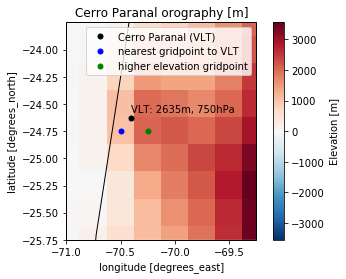

In [112]:
# orography of Cerro Paranal ###################

g= 9.81
ele = ds_orography.z_0001
Paranal = ele[0, 448:466, 1154:1164]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)

Paranal.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'});

ax.coastlines();
ax.set_extent([-71, -69.25, -25.75, -23.75])

x_ticks = np.arange(-69.25,-71, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(-25.75,-23.75,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = 289.6
lat = -24.63
plt.plot(lon, lat, 'ko', markersize=5, label = 'Cerro Paranal (VLT)', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'VLT: 2635m, 750hPa',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = -70.5
lat = -24.75
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint to VLT', transform=ccrs.PlateCarree())

# probably better gridpoint
lon = -70.25
lat = -24.75
plt.plot(lon, lat, 'go', markersize=5, label = 'higher elevation gridpoint', transform=ccrs.PlateCarree())

plt.title("Cerro Paranal orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/Paranal/Output/Plots/orography/Paranal_orography.pdf')
plt.show()


In [ ]:
#load surface pressure and surface temperature data in
ds_surface_P_T = xr.open_dataset("/home/caroline/chaldene/cds_data_ERA5/single_level/Era5_singleLevel_test_T_SurfacePressure.nc")
#ds_MaunaKea = ds_surface_P_T.sel(longitude=204.53,latitude= 19.83,method='nearest')
Temperature = ds_surface_P_T.t2m
Surf_Pr = ds_surface_P_T.sp




In [103]:
ds_orography.z_0001[0,458,1159]/g

<xarray.DataArray 'z_0001' ()>
array(2019.30328587)
Coordinates:
    longitude  float32 289.75
    latitude   float32 -24.5
    time       datetime64[ns] 2019-03-01

In [102]:
Surf_Pr[0,458,1159]/100 # Paranal

<xarray.DataArray 'sp' ()>
array(800.38679687)
Coordinates:
    longitude  float32 289.75
    latitude   float32 -24.5
    time       datetime64[ns] 2017-01-01

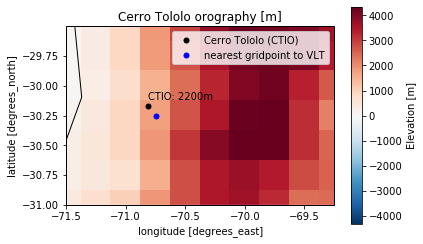

In [6]:
# orography of Cerro Tololo ###################

g= 9.81
ele = ds_orography.z_0001
Tololo = ele[0, 475:486, 1154:1164]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)


Tololo.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0);

ax.coastlines();
ax.set_extent([-71.5, -69.25, -31, -29.5])

x_ticks = np.arange(-69.25,-71, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(-31, -29.5,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = 289.19
lat = -30.17
plt.plot(lon, lat, 'ko', markersize=5, label = 'Cerro Tololo (CTIO)', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'CTIO: 2200m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = -70.75
lat = -30.25
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint to VLT', transform=ccrs.PlateCarree())

plt.title("Cerro Tololo orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/Cerro_Tololo/Output/Plots/orography/Tololo_orography.pdf')
plt.show()


In [133]:
# tololo surf. pressure
Surf_Pr[0,481,1157]/100

<xarray.DataArray 'sp' ()>
array(823.82789063)
Coordinates:
    longitude  float32 289.25
    latitude   float32 -30.25
    time       datetime64[ns] 2017-01-01

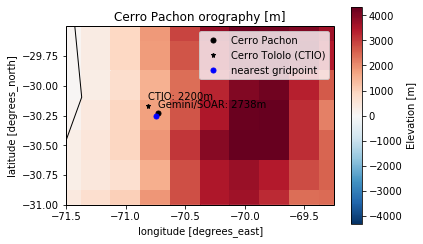

In [13]:
# orography of Cerro Tololo ###################

g= 9.81
ele = ds_orography.z_0001
Tololo = ele[0, 475:486, 1154:1164]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)


Tololo.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0);

ax.coastlines();
ax.set_extent([-71.5, -69.25, -31, -29.5])

x_ticks = np.arange(-69.25,-71, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(-31, -29.5,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = 289.27
lat = -30.23
plt.plot(lon, lat, 'ko', markersize=5, label = 'Cerro Pachon', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'Gemini/SOAR: 2738m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

lon = 289.19
lat = -30.17
plt.plot(lon, lat, 'k*', markersize=5, label = 'Cerro Tololo (CTIO)', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'CTIO: 2200m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = 289.25
lat = -30.25
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint', transform=ccrs.PlateCarree())

plt.title("Cerro Pachon orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/Cerro_Pachon/Output/Plots/orography/Pachon_orography.pdf')
plt.show()

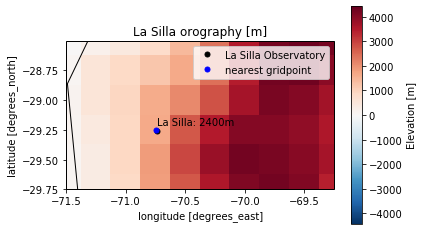

In [145]:
# orography of La Silla ###################

g= 9.81
ele = ds_orography.z_0001
LaSilla = ele[0, 470:480, 1154:1164]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)


LaSilla.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0);

ax.coastlines();
ax.set_extent([-71.5, -69.25, -29.75, -28.5])

x_ticks = np.arange(-69.25,-71, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(-29.75, -28.5,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = -70.74
lat = -29.26
plt.plot(lon, lat, 'ko', markersize=5, label = 'La Silla Observatory', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'La Silla: 2400m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = -70.75
lat = -29.25
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint', transform=ccrs.PlateCarree())

plt.title("La Silla orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/La_Silla/Output/Plots/orography/La_Silla_orography.pdf')
plt.show()


In [143]:
# la silla surf. pressure
Surf_Pr[0,477,1157]/100

<xarray.DataArray 'sp' ()>
array(835.46265625)
Coordinates:
    longitude  float32 289.25
    latitude   float32 -29.25
    time       datetime64[ns] 2017-01-01

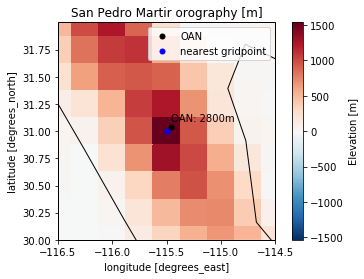

In [24]:
# orography of San Pedro Martir, Baja California ###################

g= 9.81
ele = ds_orography.z_0001
Baja = ele[0, 230:243, 974:983]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)


Baja.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0);

ax.coastlines();
ax.set_extent([-114.5, -116.5, 30, 32])

x_ticks = np.arange(-114.5,-116.5, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(30, 32,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = -115.46
lat = 31.04
plt.plot(lon, lat, 'ko', markersize=5, label = 'OAN', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'OAN: 2800m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = -115.5
lat = 31
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint', transform=ccrs.PlateCarree())

plt.title("San Pedro Martir orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/Baja/Output/Plots/orography/San_Pedro_Martir_orography.pdf')
plt.show()


In [158]:
# baja elevation
ds_orography.z_0001[0,236,978]/g

<xarray.DataArray 'z_0001' ()>
array(1535.73422369)
Coordinates:
    longitude  float32 244.5
    latitude   float32 31.0
    time       datetime64[ns] 2019-03-01

In [160]:
# Baja surf. pressure
Surf_Pr[0,236,978]/100

<xarray.DataArray 'sp' ()>
array(842.41609375)
Coordinates:
    longitude  float32 244.5
    latitude   float32 31.0
    time       datetime64[ns] 2017-01-01

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

extent = [5, 20, 36, 48]

request = cimgt.GoogleTiles()

fig, ax = plt.subplots(figsize=(10, 15))
ax = plt.axes(projection=request.crs)
ax.set_extent(extent)
ax.add_image(request, 6)
plt.show()

ValueError: A non-empty list of tiles should be provided to merge.

<Figure size 720x1080 with 1 Axes>

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

extent = [-17.75, -18, 28.7,28.8]

request = cimgt.GoogleTiles()

fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.axes(projection=request.crs)
laPalma.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0);

lon = -17.89
lat = 28.75
plt.plot(lon, lat, 'ko', markersize=5, label = 'TNG', transform=ccrs.PlateCarree())

ax.set_extent(extent)
ax.add_image(request, 7)
plt.show()


ValueError: A non-empty list of tiles should be provided to merge.

<Figure size 360x360 with 2 Axes>

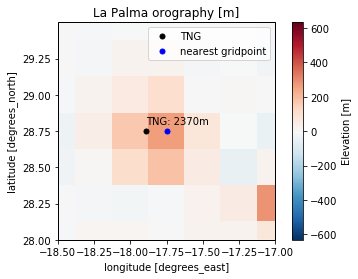

In [22]:
# orography of La Palma ###################

g= 9.81
ele = ds_orography.z_0001
laPalma = ele[0, 240:250, 1364:1374]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)

# add google tiles
#request = cimgt.GoogleTiles()
#ax = plt.axes(projection=request.crs)
#ax.add_image(request, 7)


laPalma.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0,
                        alpha = 1);

ax.coastlines();
ax.set_extent([-17, -18.5, 28 ,29.5])
#ax.stock_img()

x_ticks = np.arange(-17,-19, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(28, 29.5,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = -17.89
lat = 28.75
plt.plot(lon, lat, 'ko', markersize=5, label = 'TNG', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'TNG: 2370m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = -17.75
lat = 28.75
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint', transform=ccrs.PlateCarree())

plt.title("La Palma orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/La_Palma/Output/Plots/orography/La_Palma_orography.pdf')
plt.show()


In [168]:
# La Palma elevation
ds_orography.z_0001[0,245,1368]/g

#ds_LaPalma = ds_orography.sel(longitude=(360-17.89),latitude= 28.75,method='nearest')

<xarray.DataArray 'z_0001' ()>
array(168.96231026)
Coordinates:
    longitude  float32 342.0
    latitude   float32 28.75
    time       datetime64[ns] 2019-03-01

In [14]:
# La Palma surf. pressure
Surf_Pr[0,245,1368]/100

<xarray.DataArray 'sp' ()>
array(1000.68171875)
Coordinates:
    longitude  float32 342.0
    latitude   float32 28.75
    time       datetime64[ns] 2017-01-01

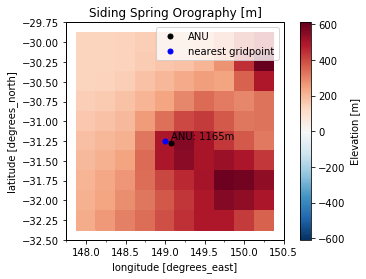

In [33]:
# orography of siding spring ###################

g= 9.81
ele = ds_orography.z_0001
Australia = ele[0, 480:490, 592:602]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)

# add google tiles
#request = cimgt.GoogleTiles()
#ax = plt.axes(projection=request.crs)
#ax.add_image(request, 7)


Australia.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0,
                        alpha = 1);

ax.coastlines();
#ax.set_extent([147, 151, -33 ,-29])
#ax.stock_img()

x_ticks = np.arange(145,155, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(-33, -29,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = 149.07
lat = -31.28
plt.plot(lon, lat, 'ko', markersize=5, label = 'ANU', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'ANU: 1165m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = 149
lat = -31.25
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint', transform=ccrs.PlateCarree())

plt.title("Siding Spring Orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/siding_spring_anu/Output/Plots/Siding_Spring_orography.pdf')
plt.show()


In [34]:
# Siding Spring elevation
ds_orography.z_0001[0,485,596]/g

<xarray.DataArray 'z_0001' ()>
array(495.5523103)
Coordinates:
    longitude  float32 149.0
    latitude   float32 -31.25
    time       datetime64[ns] 2019-03-01

In [35]:
# Siding Spring surf. pressure
Surf_Pr[0,485,596]/100

<xarray.DataArray 'sp' ()>
array(948.97257813)
Coordinates:
    longitude  float32 149.0
    latitude   float32 -31.25
    time       datetime64[ns] 2017-01-01

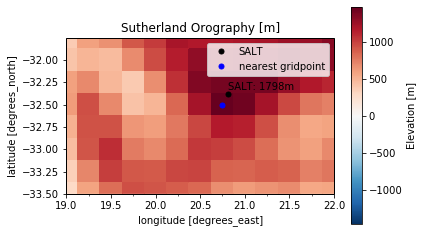

In [47]:
# orography of Sutherland ###################

g= 9.81
ele = ds_orography.z_0001
Sutherland = ele[0, 487:495, 76:90]/g

ax = plt.axes(projection=ccrs.PlateCarree()) #ccrs.Orthographic(204, 19)

# add google tiles
#request = cimgt.GoogleTiles()
#ax = plt.axes(projection=request.crs)
#ax.add_image(request, 7)


Sutherland.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Elevation [m]'}, center = 0,
                        alpha = 1);

ax.coastlines();
ax.set_extent([19, 22, -33.5 ,-31.75])
#ax.stock_img()

x_ticks = np.arange(19,22, 0.25)
ax.set_xticks(x_ticks, crs=ccrs.PlateCarree(), minor = True)
y_ticks = np.arange(-33.5, -31.75,  0.25)
ax.set_yticks(y_ticks,crs=ccrs.PlateCarree())

lon = 20.81
lat = -32.38
plt.plot(lon, lat, 'ko', markersize=5, label = 'SALT', transform=ccrs.PlateCarree())
plt.text(lon, lat + 0.05, 'SALT: 1798m',
         horizontalalignment='left',
         transform=ccrs.PlateCarree())

#nearest
lon = 20.75
lat = -32.5
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint', transform=ccrs.PlateCarree())

plt.title("Sutherland Orography [m]")
fig1 = plt.gcf()

#plt.legend(loc = 'center right', bbox_to_anchor=(1.1, 1.05))
plt.legend()
fig1.savefig('/home/caroline/chaldene/Astroclimate_Project/sites/Sutherland/Output/Plots/Sutherland_orography.pdf')
plt.show()


In [37]:
# Sutherland elevation
ds_orography.z_0001[0,490,83]/g

<xarray.DataArray 'z_0001' ()>
array(1472.3017608)
Coordinates:
    longitude  float32 20.75
    latitude   float32 -32.5
    time       datetime64[ns] 2019-03-01

In [38]:
# Sutherland surf. pressure
Surf_Pr[0,490,83]/100

<xarray.DataArray 'sp' ()>
array(854.14515625)
Coordinates:
    longitude  float32 20.75
    latitude   float32 -32.5
    time       datetime64[ns] 2017-01-01

############################## SURFACE PRESSURE ########################

In [23]:
#load surface pressure and surface temperature data in
ds_surface_P_T = xr.open_dataset("/home/caroline/chaldene/cds_data_ERA5/single_level/Era5_singleLevel_test_T_SurfacePressure.nc")
#ds_MaunaKea = ds_surface_P_T.sel(longitude=204.53,latitude= 19.83,method='nearest')
Temperature = ds_surface_P_T.t2m
Surf_Pr = ds_surface_P_T.sp



In [15]:
# surface pressure value at Mauna Kea nearest gridpoint
ds_MaunaKea = ds_surface_P_T.sel(longitude=204.53,latitude= 19.83,method='nearest')
Temp_MK = ds_MaunaKea.t2m
Surf_Pr_MK = ds_MaunaKea.sp

In [16]:
Temp_MK[0]



<xarray.DataArray 't2m' ()>
array(285.78006, dtype=float32)
Coordinates:
    longitude  float32 204.5
    latitude   float32 19.75
    time       datetime64[ns] 2017-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [17]:
Surf_Pr_MK

<xarray.DataArray 'sp' (time: 24)>
array([78361.625, 78367.63 , 78385.63 , 78425.08 , 78459.37 , 78476.516,
       78523.67 , 78545.11 , 78581.12 , 78585.41 , 78577.69 , 78526.25 ,
       78494.52 , 78451.66 , 78431.08 , 78427.65 , 78471.375, 78503.09 ,
       78535.68 , 78579.41 , 78588.836, 78580.266, 78535.68 , 78462.8  ],
      dtype=float32)
Coordinates:
    longitude  float32 204.5
    latitude   float32 19.75
  * time       (time) datetime64[ns] 2017-01-01 ... 2017-01-01T23:00:00
Attributes:
    units:          Pa
    long_name:      Surface pressure
    standard_name:  surface_air_pressure

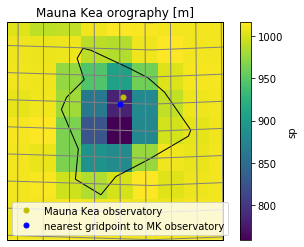

In [6]:
#%% plot surface pressure

#ele[0, 279:283, 817:821]
MK = Surf_Pr[0, 275:287, 813:825]/100 # to hPa
# MK.plot()
#air2d = ele.isel(time = 0)

ax = plt.axes(projection=ccrs.Orthographic(204, 19))#Mercator()

MK.plot(ax=ax, transform=ccrs.PlateCarree());

ax.coastlines();
ax.set_extent([203.4, 205.5, 18.5, 20.5]) #, ccrs.Geodetic()

#observatory (google maps) Mauna Kea
lon = -155.46806
lat = 19.82083
#x,y = m2(lon, lat)
plt.plot(lon, lat, 'yo', markersize=5, label = 'Mauna Kea observatory', transform=ccrs.PlateCarree())

#nearest
lon = -155.5
lat = 19.75
#x,y = m2(lon, lat)
plt.plot(lon, lat, 'bo', markersize=5, label = 'nearest gridpoint to MK observatory', transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), xlocs=np.arange(-180, 180, 0.25), ylocs = np.arange(-80.,81.,0.25),
                 linewidth=1, color='gray', linestyle='-')
#ax.set_xticks(-155.5)

#gl.xlocator = mticker.FixedLocator()

plt.title("Mauna Kea orography [m]")
plt.legend(loc = 'lower left')
fig1 = plt.gcf()
fig1.savefig('MaunaKea_surfacePressure_2017_cartopy.pdf')
plt.show()


In [ ]:
#observatory (google maps) Mauna Kea
lon = -155.46806
lat = 19.82083
x,y = m2(lon, lat)
m2.plot(x, y, 'yo', markersize=2, label = 'Mauna Kea observatory')